In [30]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import pandas as pd
import networkx as nx
import tensorflow as tf
import numpy as np
from utils.utils import predict
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
model_m_to_s = tf.keras.models.load_model("./model/gbif_batch_128_layer_1024_m_to_s", compile=True)
model_s_to_m = tf.keras.models.load_model("./model/gbif_batch_128_layer_1024_s_to_m", compile=True)

In [3]:
species_features_dummy = pd.read_csv("./data/species_features.csv.gz", index_col=0)
molecule_features_dummy = pd.read_csv("./data/molecule_features.csv.gz", index_col=0)
df_agg = pd.read_csv("./data/lotus_agg_test.csv.gz", index_col=0)

In [4]:
rdkit = pd.read_csv("./data/mol_dummy_rdkit.csv.gz", index_col=0).astype('uint8')
rdkit.columns = rdkit.columns.astype(str)

In [5]:
g_train = nx.read_graphml("./graph/train_graph.gml")
g = nx.read_graphml("./graph/test_graph.gml")
g  = nx.create_empty_copy(g)
g_merged = nx.compose(g_train, g)

In [6]:
df_agg_train = pd.read_csv("./data/lotus_agg_train.csv.gz", index_col=0)

In [7]:
g_test = nx.read_graphml("./graph/test_graph.gml")
g_lotus = nx.compose(g_train, g_test)

In [8]:
sku = pd.concat([df_agg, df_agg_train])

In [9]:
sp = 'Trigonostemon reidioides'
data_3 = pd.DataFrame(
    {'molecule': list(set(molecule_features_dummy.index)-set(sku[sku.organism_name==sp].structure_smiles_2D)),
     'species': sp})

In [10]:
data_3

,molecule,species
0,CC(=O)OCC1=COC(OC(=O)CC(C)(C)OC(C)=O)C2C1=CC(O...,Trigonostemon reidioides
1,CC1=CC2OC(=O)CC3C4(C)CCC(=O)C(C)(C)C4CCC23C1,Trigonostemon reidioides
2,CCC(=O)c1cc(OC)c(OC)c(OC)c1,Trigonostemon reidioides
3,CC(=O)OC1C(=O)C2(CO)C(O)CC3OCC3(OC(C)=O)C2C(OC...,Trigonostemon reidioides
4,CN1C(=O)C2(Cc3cn(C45CC67SSC(CO)(C(=O)N6C4Nc4cc...,Trigonostemon reidioides
...,...,...
147728,CC1CCC2(C(=O)O)CCC3(C)C(=CCC4C5(C)CC(O)C(O)C(C...,Trigonostemon reidioides
147729,COc1ccc(CC2COC(=O)C2Cc2ccc(O)c(OC)c2)cc1O,Trigonostemon reidioides
147730,O=C(O)C1(O)C=CCCC1=O,Trigonostemon reidioides
147731,C=Cc1c(C)c(O)cc2c1-c1ccc(O)c(C)c1CC2,Trigonostemon reidioides


In [11]:
out_3 = predict(g_lotus,
                model_m_to_s,
                model_s_to_m,
                data_3,
                molecule_features_dummy,
                rdkit,
                species_features_dummy
               )

Converting Inchikeys to SMILES...
Getting missing features...
Converting species taxonomy as numeric...
Converting molecules as numeric...
Checking which model should be used for each row...
Adding missing nodes to the graph...
Converting NetworkX to Stellargraph...
StellarDiGraph: Directed multigraph
 Nodes: 184194, Edges: 869484

 Node types:
  molecule: [147747]
    Features: float32 vector, length 155
    Edge types: molecule-present_in->species
  species: [36447]
    Features: float32 vector, length 69
    Edge types: species-has->molecule

 Edge types:
    species-has->molecule: [434742]
        Weights: all 1 (default)
        Features: none
    molecule-present_in->species: [434742]
        Weights: all 1 (default)
        Features: none
Creating 'forward', 'backward' flow for KNOWN molecule AND species...
Predict both : running molecule to species predictions...
145/145 [==============================] - 20s 140ms/step
Predict both : running species to molecules prediction...


[Text(0.5, 0, 'Probabilities'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Distribution of the probabilities of all molecules ')]

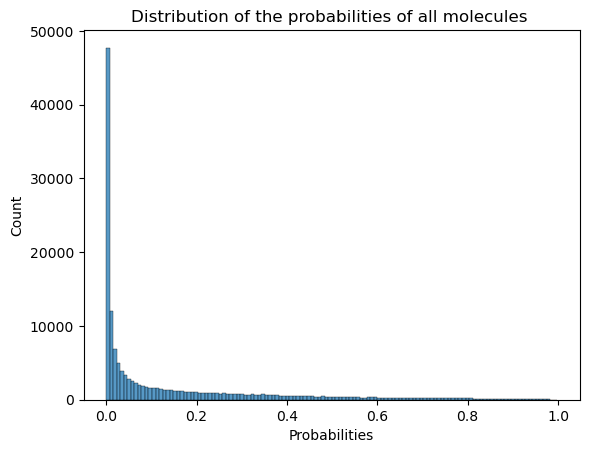

In [33]:
ax_3 = sns.histplot(data=out_3, x=out_3.prob)
ax_3.set(xlabel="Probabilities",
        ylabel="Count",
        title="Distribution of the probabilities of all molecules ")

In [13]:
out_3[out_3.prob>0.95]

,molecule,species,model,prob
478,COC(=O)C1(C)CCC2(C)CC(O)C3(C)C4=CC=C5C(=CC(=O)...,Trigonostemon reidioides,both_known,0.980284
552,CC1(C)CCC2(C(=O)O)CC=C3C(C)(CCC4C3(C)CCC3C(C)(...,Trigonostemon reidioides,both_known,0.969717
1346,COc1cc(C2c3cc4c(cc3CC3COC(=O)C32)OCO4)cc(OC)c1OC,Trigonostemon reidioides,both_known,0.978088
2047,COc1cc(C2OCC3C(c4cc(OC)c(O)c(OC)c4)OCC23)ccc1O,Trigonostemon reidioides,both_known,0.958659
2985,C=C(C)C12OC3(c4ccccc4)OC1C1C(OC(C)=O)C(C)(O)C(...,Trigonostemon reidioides,both_known,0.966478
...,...,...,...,...
143500,O=c1ccc2cc(O)c(O)cc2o1,Trigonostemon reidioides,both_known,0.950650
143547,CC1(C(=O)O)CCC2(C)CCC3(C)C4=CC(O)=C5C(=CC(=O)C...,Trigonostemon reidioides,both_known,0.978034
143657,CCC(C=CC(C)C1CCC2C3CC=C4CC(=O)CCC4(C)C3CCC12C)...,Trigonostemon reidioides,both_known,0.981582
144838,COc1cc(C2OCC3C(c4cc(OC)c(OC)c(OC)c4)OCC23)ccc1O,Trigonostemon reidioides,both_known,0.956075


# Test 4: let's see if cholesterol is present "everywhere"


In [14]:
mol = 'CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C'
data_4 = pd.DataFrame(
    {'molecule': mol,
     'species': list(set(species_features_dummy.index)-set(sku[sku.structure_smiles_2D==mol].organism_name))})

In [15]:
out_4 = predict(g_lotus,
                model_m_to_s,
                model_s_to_m,
                data_4,
                molecule_features_dummy,
                rdkit,
                species_features_dummy
               )

Converting Inchikeys to SMILES...
Getting missing features...
Converting species taxonomy as numeric...
Converting molecules as numeric...
Checking which model should be used for each row...
Adding missing nodes to the graph...
Converting NetworkX to Stellargraph...
StellarDiGraph: Directed multigraph
 Nodes: 184194, Edges: 869484

 Node types:
  molecule: [147747]
    Features: float32 vector, length 155
    Edge types: molecule-present_in->species
  species: [36447]
    Features: float32 vector, length 69
    Edge types: species-has->molecule

 Edge types:
    species-has->molecule: [434742]
        Weights: all 1 (default)
        Features: none
    molecule-present_in->species: [434742]
        Weights: all 1 (default)
        Features: none
Creating 'forward', 'backward' flow for KNOWN molecule AND species...
Predict both : running molecule to species predictions...
36/36 [==============================] - 5s 149ms/step
Predict both : running species to molecules prediction...
36/

[Text(0.5, 0, 'Probabilities'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Distribution of the probabilities of Cholesterol queried on all the species.')]

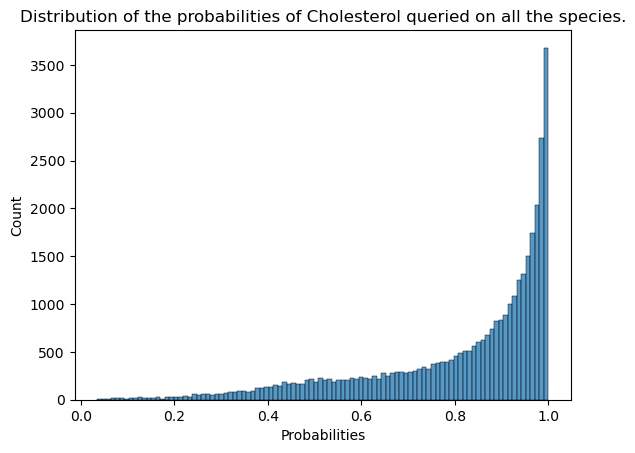

In [86]:
ax_4 = sns.histplot(data=out_4, x=out_4.prob, bins=100)
ax_4.set(xlabel="Probabilities",
        ylabel="Count",
        title="Distribution of the probabilities of Cholesterol queried on all the species.")

In [17]:
out_4[out_4.prob>0.99]

,molecule,species,model,prob
38,CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,Erigeron philadelphicus,both_known,0.995776
43,CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,Mangifera foetida,both_known,0.998173
44,CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,Homalomena aromatica,both_known,0.997783
46,CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,Pteris longifolia,both_known,0.996185
49,CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,Pteridium,both_known,0.998195
...,...,...,...,...
35916,CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,Suillus cavipes,both_known,0.990258
35918,CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,Ocimum basilicum,both_known,0.996998
35919,CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,Chara aspera,both_known,0.995019
35924,CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,Pellia endiviifolia,both_known,0.995283


# Test 5: test with a more rare molecule : Erythromycin

In [18]:
mol = 'CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(OC2OC(C)CC(N(C)C)C2O)C(C)(O)CC(C)C(=O)C(C)C(O)C1(C)O'
data_5 = pd.DataFrame(
    {'molecule': mol,
     'species': list(set(species_features_dummy.index)-set(sku[sku.structure_smiles_2D==mol].organism_name))}
)

In [19]:
out_5 = predict(g_lotus,
                model_m_to_s,
                model_s_to_m,
                data_5,
                molecule_features_dummy,
                rdkit,
                species_features_dummy
               )

Converting Inchikeys to SMILES...
Getting missing features...
Converting species taxonomy as numeric...
Converting molecules as numeric...
Checking which model should be used for each row...
Adding missing nodes to the graph...
Converting NetworkX to Stellargraph...
StellarDiGraph: Directed multigraph
 Nodes: 184194, Edges: 869484

 Node types:
  molecule: [147747]
    Features: float32 vector, length 155
    Edge types: molecule-present_in->species
  species: [36447]
    Features: float32 vector, length 69
    Edge types: species-has->molecule

 Edge types:
    species-has->molecule: [434742]
        Weights: all 1 (default)
        Features: none
    molecule-present_in->species: [434742]
        Weights: all 1 (default)
        Features: none
Creating 'forward', 'backward' flow for KNOWN molecule AND species...
Predict both : running molecule to species predictions...
36/36 [==============================] - 5s 151ms/step
Predict both : running species to molecules prediction...
36/

[Text(0.5, 0, 'Probabilities'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Distribution of the probabilities of Erythromycin queried on all the species.')]

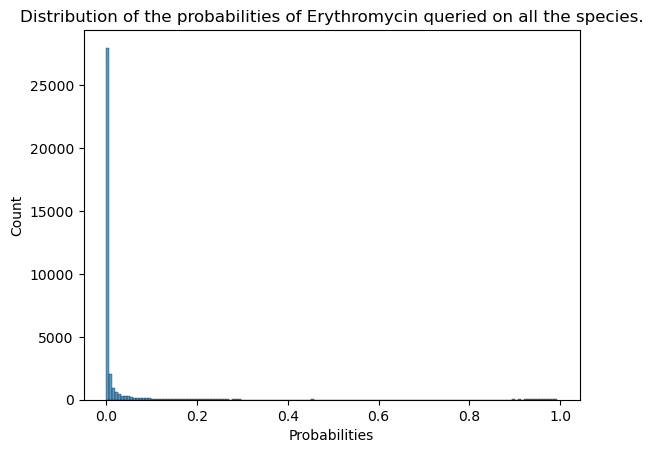

In [85]:
ax_5 = sns.histplot(data=out_5, x=out_5.prob, bins=150,)
ax_5.set(xlabel="Probabilities",
        ylabel="Count",
        title="Distribution of the probabilities of Erythromycin queried on all the species.")

In [76]:
out_5[out_5.prob>0.95]

,molecule,species,model,prob
27,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,Streptomyces nodosus,both_known,0.984954
103,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,Streptomyces fungicidicus,both_known,0.965707
219,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,Streptomyces ascomycinicus,both_known,0.977354
252,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,Streptomyces scabrisporus,both_known,0.974685
433,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,Streptomyces tendae,both_known,0.962370
...,...,...,...,...
35567,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,Streptomyces ruber,both_known,0.960999
36002,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,Streptomyces rishiriensis,both_known,0.978611
36095,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,Streptomyces echinoruber,both_known,0.962174
36296,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,Streptomyces diastatochromogenes,both_known,0.989998


In [72]:
out_5_latex = out_5[out_5.prob>0.989].copy()
out_5_latex['molecule'] = "Erythromycin"
out_5_latex.drop(columns='model', inplace=True)
out_5_latex.rename(columns={
    "molecule": "Molecule",
    "species": "Species",
    "prob": "Probability"
}, inplace=True)

In [74]:
print(out_5_latex.to_latex(
    index=False,
    float_format="{:.4f}".format,
)
)

\begin{tabular}{llr}
\toprule
Molecule & Species & Probability \\
\midrule
Erythromycin & Streptomyces diastaticus & 0.9896 \\
Erythromycin & Streptomyces & 0.9934 \\
Erythromycin & Micromonospora & 0.9896 \\
Erythromycin & Streptomyces argillaceus & 0.9926 \\
Erythromycin & Streptomyces fradiae & 0.9928 \\
Erythromycin & Streptomyces antibioticus & 0.9917 \\
Erythromycin & Streptomyces setonii & 0.9897 \\
Erythromycin & Streptomyces halstedii & 0.9891 \\
Erythromycin & Streptomyces ansochromogenes & 0.9898 \\
Erythromycin & Streptomyces diastatochromogenes & 0.9900 \\
\bottomrule
\end{tabular}



# Test adding just one edge to an unkown molecule to see the difference

In [22]:
mol = 'CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C'
data_6 = pd.DataFrame(
    {'molecule': mol,
     'species': list(set(species_features_dummy.index)-set(sku[sku.structure_smiles_2D==mol].organism_name))})

In [23]:
g_lotus.add_node('CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C', label='molecule')
g_lotus.add_edge('CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C', 'Mus musculus', label='present_in')
g_lotus.add_edge('Mus musculus','CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C', label='has')
g_lotus.add_edge('CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C', 'Dicranum japonicum', label='present_in')
g_lotus.add_edge( 'Dicranum japonicum', 'CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C', label='has')
g_lotus.add_edge('CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C', 'Streptomyces atratus', label='present_in')
g_lotus.add_edge('Streptomyces atratus','CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C', label='has')
g_lotus.add_edge('CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C','Campylopus richardii', label='present_in')
g_lotus.add_edge('Campylopus richardii','CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C', label='has')
g_lotus.add_edge('CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C','Suaeda aegyptiaca', label='present_in')
g_lotus.add_edge('Suaeda aegyptiaca','CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C', label='has')

In [24]:
from utils.molecules import smiles_to_classyfire, smiles_to_fingerprint

In [25]:
chol_classy = smiles_to_classyfire(['CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C'])

In [26]:
chol_fp = smiles_to_fingerprint(['CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C'])
chol_fp.columns  = chol_fp.columns.astype(str)

In [27]:
out_6 = predict(g_lotus,
                model_m_to_s,
                model_s_to_m,
                data_6,
                pd.concat([molecule_features_dummy, chol_classy]),
                pd.concat([rdkit, chol_fp]),
                species_features_dummy
               )

Converting Inchikeys to SMILES...
Getting missing features...
Converting species taxonomy as numeric...
Converting molecules as numeric...
Checking which model should be used for each row...
Adding missing nodes to the graph...
Converting NetworkX to Stellargraph...
StellarDiGraph: Directed multigraph
 Nodes: 184195, Edges: 869494

 Node types:
  molecule: [147748]
    Features: float32 vector, length 155
    Edge types: molecule-present_in->species
  species: [36447]
    Features: float32 vector, length 69
    Edge types: species-has->molecule

 Edge types:
    species-has->molecule: [434747]
        Weights: all 1 (default)
        Features: none
    molecule-present_in->species: [434747]
        Weights: all 1 (default)
        Features: none
Creating 'forward', 'backward' flow for KNOWN molecule AND species...
Predict both : running molecule to species predictions...
36/36 [==============================] - 7s 198ms/step
Predict both : running species to molecules prediction...
36/

(array([ 15.,  17.,  26.,  28.,  23.,  23.,  26.,  29.,  27.,  25.,  24.,
         27.,  28.,  32.,  25.,  25.,  37.,  33.,  33.,  38.,  39.,  39.,
         54.,  42.,  53.,  65.,  51.,  63.,  65.,  51.,  74.,  61.,  75.,
         65.,  85.,  82.,  75.,  83.,  88.,  69.,  80.,  85.,  78.,  92.,
         94.,  84.,  90.,  87.,  93.,  81.,  90.,  98.,  96., 106.,  99.,
         82., 106.,  98., 110., 116.,  96., 115., 107., 109., 119., 125.,
        130., 116., 114., 115., 127., 139., 119., 117., 139., 141., 129.,
        140., 129., 141., 114., 135., 129., 108., 143., 119., 135., 131.,
        120., 144., 159., 141., 129., 124., 146., 157., 142., 135., 131.,
        148., 144., 136., 159., 152., 141., 157., 167., 174., 160., 173.,
        178., 167., 174., 152., 170., 193., 188., 194., 179., 157., 177.,
        188., 218., 201., 210., 199., 201., 190., 209., 218., 195., 238.,
        247., 226., 244., 230., 217., 233., 244., 226., 269., 275., 241.,
        241., 250., 271., 266., 276., 

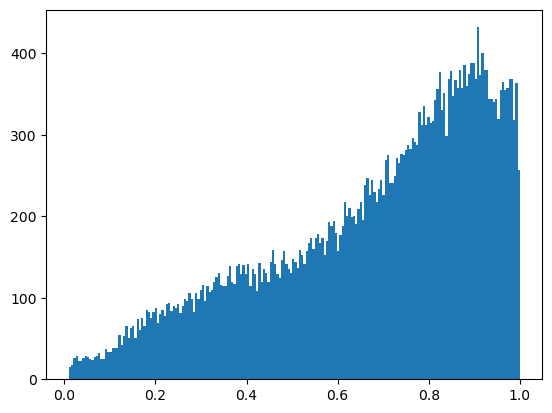

In [28]:
plt.hist(out_6.prob, bins=200)

In [29]:
out_6[out_6.prob>0.99]

,molecule,species,model,prob
40,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Sesamum radiatum,both_known,0.996309
159,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Euplotes raikovi,both_known,0.993238
193,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Lilium elegans,both_known,0.994642
196,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Medicago saxatilis,both_known,0.990938
234,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Cistus monspeliensis,both_known,0.993362
...,...,...,...,...
35990,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Eucalyptus ochrophloia,both_known,0.993757
36042,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Cymodocea nodosa,both_known,0.993457
36091,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Ctenopharyngodon idella,both_known,0.994088
36226,CC(C)CCCC(C)C1CCC2C1(CCC3C2CC=C4C3(CCC(C4)O)C)C,Pseudo-nitzschia multistriata,both_known,0.999180
